# Data Import


In [335]:
import pandas as pd
import numpy as np

# Import csv data
df = pd.read_csv("data.csv")
print(df.shape)
df.head()

(169909, 19)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


# Data Preparation

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,15865.0,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1930
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,28213.0,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1930
2,0.604,['Seweryn Goszczyński'],0.749,10430.0,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1930
3,0.995,['Francisco Canaro'],0.781,18076.0,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1930
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,68773.0,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1930


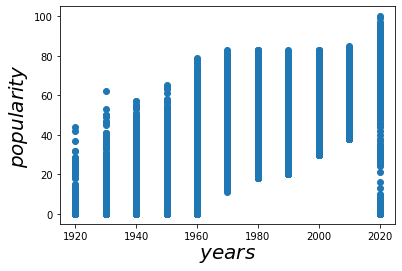

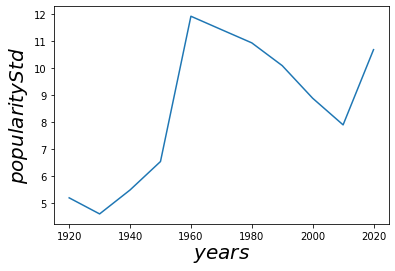

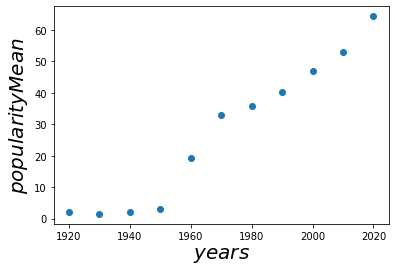

In [336]:
def customRound(x, base):
    return base * round(x/base)


#Change it to every 10 years
df['year'] = round(df['year'], -1)
years = df.year

import matplotlib.pyplot as plt

#Rounding Data
df['duration_ms'] = customRound(df['duration_ms'], 10) / 10


yearsList = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
popStd = []
popMean = []

for y in yearsList:
    popStd.append(np.std(df[df.year == y]['popularity']))
    popMean.append(np.mean(df[df.year == y]['popularity']))
                        

fig = plt.figure(figsize=(6,4))
plt.scatter(df.sort_values('year').year,df.sort_values('year').popularity)
plt.xlabel(r'$years$',size=20)
plt.ylabel(r'$popularity$',size=20)

fig2 = plt.figure(figsize=(6,4))
plt.plot(yearsList,popStd)
plt.xlabel(r'$years$',size=20)
plt.ylabel(r'$popularityStd$',size=20)

fig3 = plt.figure(figsize=(6,4))
plt.scatter(yearsList,popMean)
plt.xlabel(r'$years$',size=20)
plt.ylabel(r'$popularityMean$',size=20)

df.head()


In [337]:
# Remove bad features
dfDropped = df.drop(columns=['name', 'id', 'artists', 'release_date', 'year', 'mode', 'liveness'])


dfDropped.shape

(169909, 12)

In [338]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dfDropped, years, test_size=0.3, random_state=10)

X_train.shape



(118936, 12)

In [340]:
clf = GaussianNB()
clf.fit(X_train,y_train)

yearPredict = clf.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, yearPredict))
print(yearPredict)

Accuracy =  0.4176524826869127
[1950 1950 2010 ... 2010 2010 2010]
